In [1]:
import string
import re
import codecs
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import feature_extraction
from sklearn import linear_model
from sklearn import pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
    import nltk
    from nltk.stem import PorterStemmer
    from nltk.corpus import stopwords
    nltk.download()
    from nltk.stem import WordNetLemmatizer
    import pandas as pd
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import pipeline
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [3]:
    ps=PorterStemmer()
    wn=WordNetLemmatizer()

In [4]:
lan_data=pd.read_csv('lan text.csv')

In [5]:
lan_data.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [6]:
lan_data.shape

(10337, 2)

## PREPROCESSING THE DATA

In [7]:
lan_data.Language.value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [8]:
def removeSymbolandNumber(text):
    text=re.sub(r'[{}]'.format(string.punctuation),'',text)
    text=re.sub(r'\d+','',text)
    text=re.sub(r'[@]','',text)
    return text.lower()

In [9]:
def removeEnglishLetters(text):
    text=re.sub(r'[a-zA-Z]+','',text)
    return text.lower()

In [10]:
X0=lan_data.apply(lambda x: removeEnglishLetters(x.Text) if x.Language in ['Russian','Malyalam','Hindi','Kannada','Tamil','Arabic'] else x.Text,axis=1)
X0

0         Nature, in the broadest sense, is the natural...
1        "Nature" can refer to the phenomena of the phy...
2        The study of nature is a large, if not the onl...
3        Although humans are part of nature, human acti...
4        [1] The word nature is borrowed from the Old F...
                               ...                        
10332    ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333    ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334    ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...
10335    ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...
10336    ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...
Length: 10337, dtype: object

In [11]:
X1=X0.apply(removeSymbolandNumber)
X1

0         nature in the broadest sense is the natural p...
1        nature can refer to the phenomena of the physi...
2        the study of nature is a large if not the only...
3        although humans are part of nature human activ...
4         the word nature is borrowed from the old fren...
                               ...                        
10332    ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333    ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334    ಹೇಗೆ  ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎಲ...
10335    ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...
10336    ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...
Length: 10337, dtype: object

In [12]:
y=lan_data['Language']

In [13]:
y

0        English
1        English
2        English
3        English
4        English
          ...   
10332    Kannada
10333    Kannada
10334    Kannada
10335    Kannada
10336    Kannada
Name: Language, Length: 10337, dtype: object

In [14]:
x_train,x_test,y_train,y_test=train_test_split(X1,y)

In [15]:
vectorizer=TfidfVectorizer(ngram_range=(1,3),analyzer='char')

In [16]:
model=pipeline.Pipeline([
    ('vectorizer',vectorizer),
    ('clf',LogisticRegression())
])

In [17]:
model.fit(x_train,y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('clf', LogisticRegression())])

## CHECKING FOR AACURACY

In [18]:
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)

In [19]:
print("ACCURACY IS : ",accuracy)

ACCURACY IS :  0.9841392649903288


In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Arabic       1.00      0.99      1.00       123
      Danish       0.97      0.93      0.95       123
       Dutch       0.99      0.96      0.97       137
     English       0.98      0.99      0.99       356
      French       0.98      0.98      0.98       254
      German       0.99      0.98      0.99       118
       Greek       1.00      1.00      1.00       113
       Hindi       1.00      1.00      1.00        13
     Italian       0.97      0.99      0.98       146
     Kannada       1.00      1.00      1.00        98
   Malayalam       1.00      1.00      1.00       151
  Portugeese       0.99      0.97      0.98       197
     Russian       1.00      0.99      1.00       165
     Spanish       0.96      0.99      0.98       186
    Sweedish       0.96      0.97      0.96       174
       Tamil       1.00      1.00      1.00       116
     Turkish       0.96      1.00      0.98       115

    accuracy              

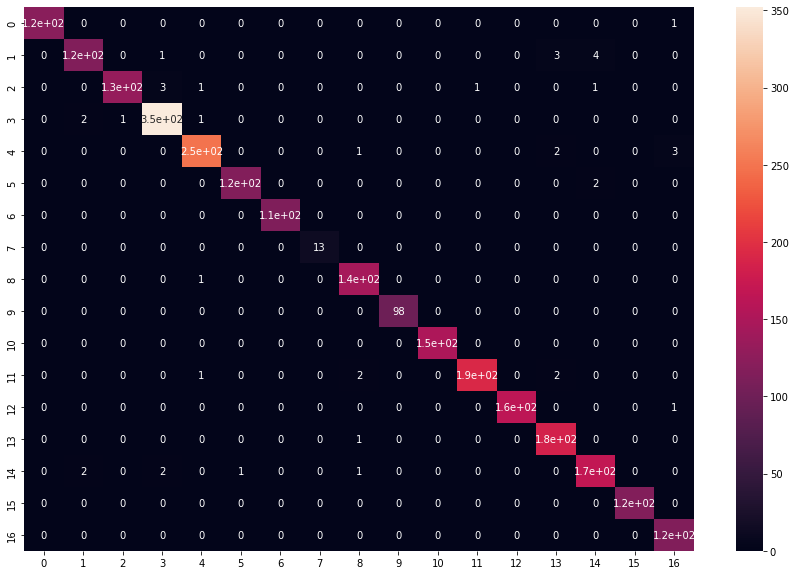

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

## TESTING MODEL

In [22]:
def predict(text):
    lang=model.predict([text])
    print('THE LANGUAGE IS : ',lang[0])

In [23]:
predict("भाषा का पता लगाने वाले मॉडल की जांच")

THE LANGUAGE IS :  Hindi


In [24]:
predict(" ऐसे शब्दों के समूह को कहते हैं जो एक पूर्ण विचार को व्यक्त करता है। वाक्य चाहे कितना भी छोटा या बड़ा हो उससे एक पूर्ण विचार व्यक्त होना चाहिए")

THE LANGUAGE IS :  Hindi


In [25]:
predict("Доброе утро")

THE LANGUAGE IS :  Russian


## SAVING THE TRAINED MODEL FOR IMPORT IN THE STREAMLIT  

In [26]:
import pickle

In [27]:
filename='trainedmodel.sav'
pickle.dump(model,open(filename,'wb'))

In [28]:
load_model=pickle.load(open('trainedmodel.sav','rb'))  #loading the save model

In [29]:
def predict(text):
    lang=load_model.predict([text])
    print(lang[0])

In [31]:
predict("")

Turkish
